In [3]:
import pandas as pd
import numpy as np
import pickle
import torchvision as tv
import json
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image, ImageStat
import glob
import numpy as np
from tqdm.auto import tqdm
from joblib import Parallel, delayed
from os.path import join as pjoin  # pylint: disable=g-importing-member
from PIL import Image, ImageStat
PATH_DATASET="/home/amorante/herbarium"

images = glob.glob(pjoin(PATH_DATASET, "train_images", "*", "*", "*.jpg"))
def _color_means(img_path):
    img = plt.imread(img_path)
    means = {i: np.mean(img[..., i]) / 255.0 for i in range(3)}
    std = {i: np.std(img[..., i]) / 255.0 for i in range(3)}
    return means, std

In [ ]:
def clean(pth):
        precrop= 380
        crop= 350

        x = tv.transforms.Compose([
                tv.transforms.Resize((precrop, precrop)),
                tv.transforms.CenterCrop((crop,crop))])
        im = Image.open(pth)
        im=x(im)
        im.save("a.jpg")
        display(im)

        print(_color_means(pth))
        print(_color_means("/home/amorante/a.jpg"))

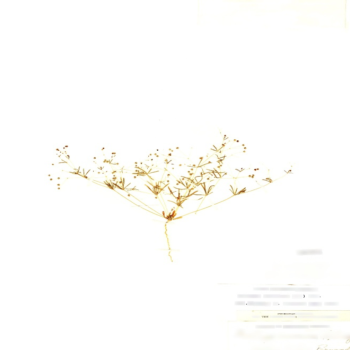

({0: 0.9942147674132414, 1: 0.9928517515792927, 2: 0.9859354226488365}, {0: 0.0448197951586647, 1: 0.05252414364194455, 2: 0.0717201051484011})
({0: 0.994648131252501, 1: 0.9935701960784313, 2: 0.9861613445378151}, {0: 0.028089949558725496, 1: 0.03380269358488338, 2: 0.0541664781811709})




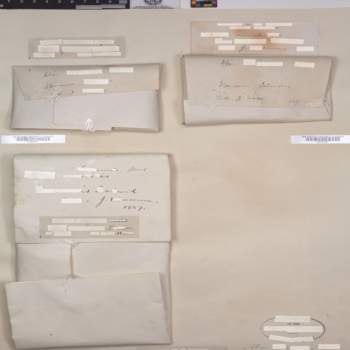

({0: 0.7304412471294824, 1: 0.6878995878231172, 2: 0.6494900076547135}, {0: 0.1760669973966862, 1: 0.168345694629421, 2: 0.15858318271818886})
({0: 0.7727731732693077, 1: 0.7258481952781112, 2: 0.682731268507403}, {0: 0.08033877361392547, 1: 0.07983708832433234, 2: 0.0794447062639286})




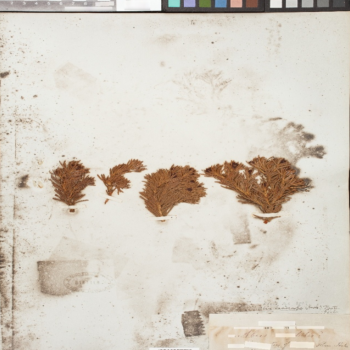

({0: 0.761697574521138, 1: 0.7357630851184405, 2: 0.6972421568627452}, {0: 0.26566434225581637, 1: 0.2753615976028317, 2: 0.2765310076029569})
({0: 0.8425503961584634, 1: 0.8163599839935974, 2: 0.7744622649059624}, {0: 0.12403467550571798, 1: 0.15450717444330944, 2: 0.17430229584119525})


In [ ]:
clean(images[30643])
print("\n")
clean("/home/amorante/herbarium/train_images/000/00/00000__007.jpg")
print("\n")
clean("/home/amorante/herbarium/train_images/000/00/00000__038.jpg")

In [ ]:
bad1=_color_means("/home/amorante/herbarium/train_images/000/00/00000__007.jpg")
bad2=_color_means("/home/amorante/herbarium/train_images/155/00/15500__034.jpg")
good1=_color_means("/home/amorante/herbarium/train_images/000/00/00000__038.jpg")
good2=_color_means("/home/amorante/herbarium/train_images/155/00/15500__024.jpg")
print(bad1, "\n", bad2,"\n", good1,"\n", good2)
def m(img):
    x=0
    for i in range(3):
        x+=img[0][i]
    print( x/3)
m(bad1)
m(bad2)
m(good1)
m(good2)

In [ ]:
images = glob.glob(pjoin(PATH_DATASET, "train_images", "*", "*", "*.jpg"))
#control ammount of images using images[:ammount]
clr_mean_std = Parallel(n_jobs=os.cpu_count())(delayed(_color_means)(fn) for fn in tqdm(images[:100000]))

img_color_mean = pd.DataFrame([c[0] for c in clr_mean_std])
img_color_std = pd.DataFrame([c[1] for c in clr_mean_std])
print(img_color_mean.describe())
print(img_color_std.describe())

  0%|          | 0/100000 [00:00<?, ?it/s]

                   0              1              2
count  100000.000000  100000.000000  100000.000000
mean        0.775083       0.753271       0.705322
std         0.068692       0.076587       0.095466
min         0.083728       0.075742       0.011422
25%         0.737434       0.707779       0.652307
50%         0.786670       0.767275       0.720631
75%         0.821214       0.807748       0.773761
max         0.994215       0.992852       0.985935
                   0              1              2
count  100000.000000  100000.000000  100000.000000
mean        0.249719       0.254030       0.256868
std         0.068711       0.068145       0.066190
min         0.044820       0.051334       0.023748
25%         0.193772       0.199516       0.206186
50%         0.277363       0.280443       0.277989
75%         0.303976       0.307497       0.308332
max         0.404001       0.414881       0.422005


In [ ]:
img_color_std["med"]=img_color_std.apply( lambda row: (row[0] + row[1] + row[2])/3,axis=1)
img_color_std.describe()

0              1              2            med
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.249719       0.254030       0.256868       0.253539
std         0.068711       0.068145       0.066190       0.067056
min         0.044820       0.051334       0.023748       0.053501
25%         0.193772       0.199516       0.206186       0.200268
50%         0.277363       0.280443       0.277989       0.278662
75%         0.303976       0.307497       0.308332       0.306759
max         0.404001       0.414881       0.422005       0.410548

In [ ]:
uwu=img_color_std["med"].between(0, 0.06)
uwu[uwu]

29042    True
30643    True
41250    True
43983    True
90679    True
Name: med, dtype: bool

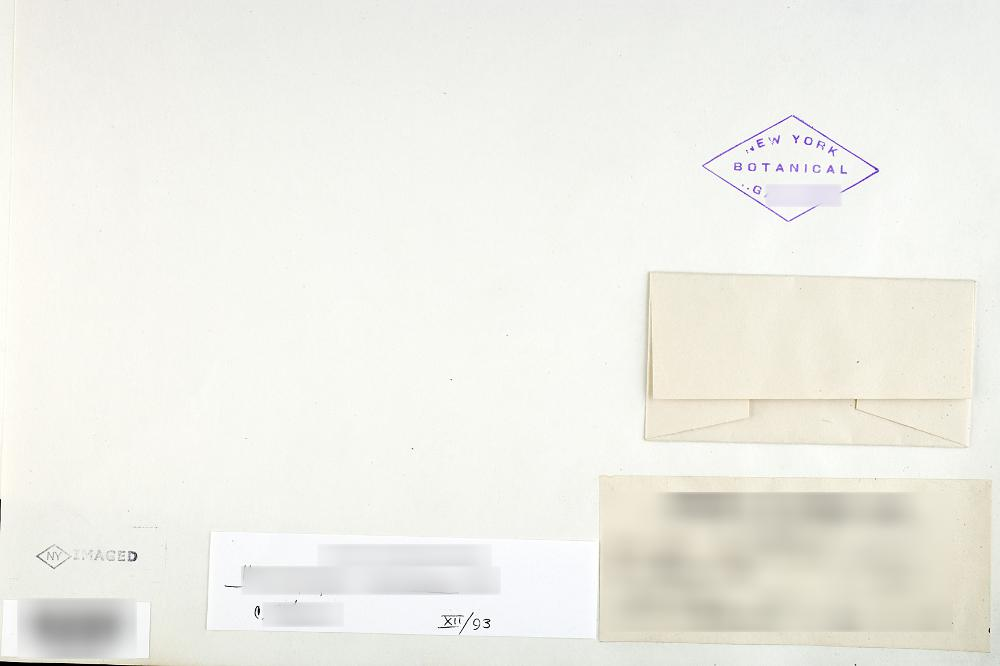

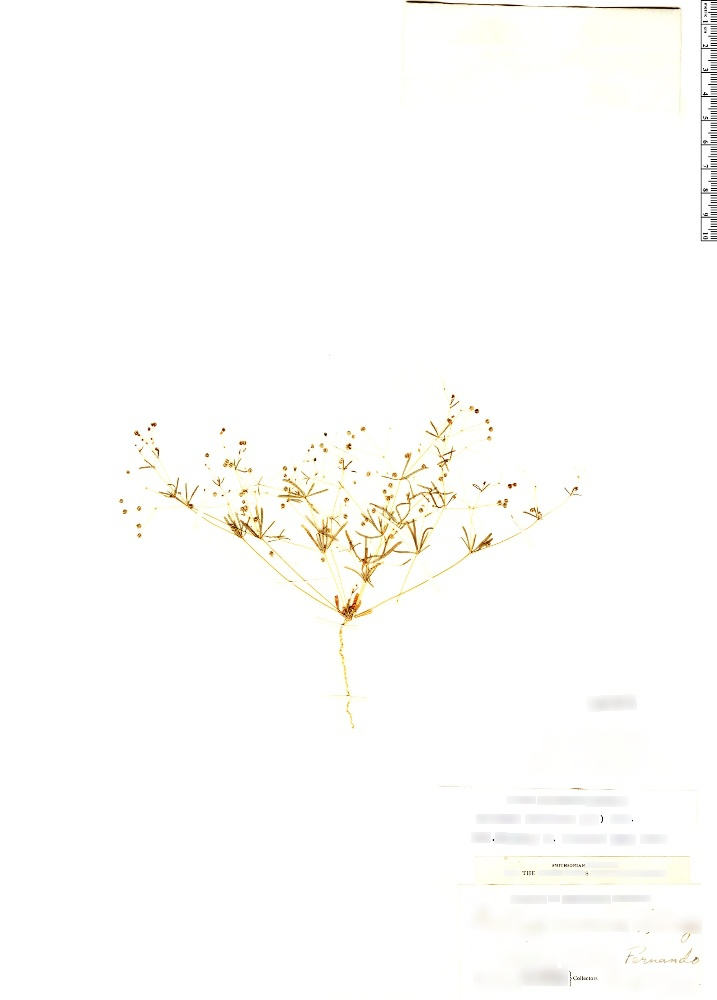

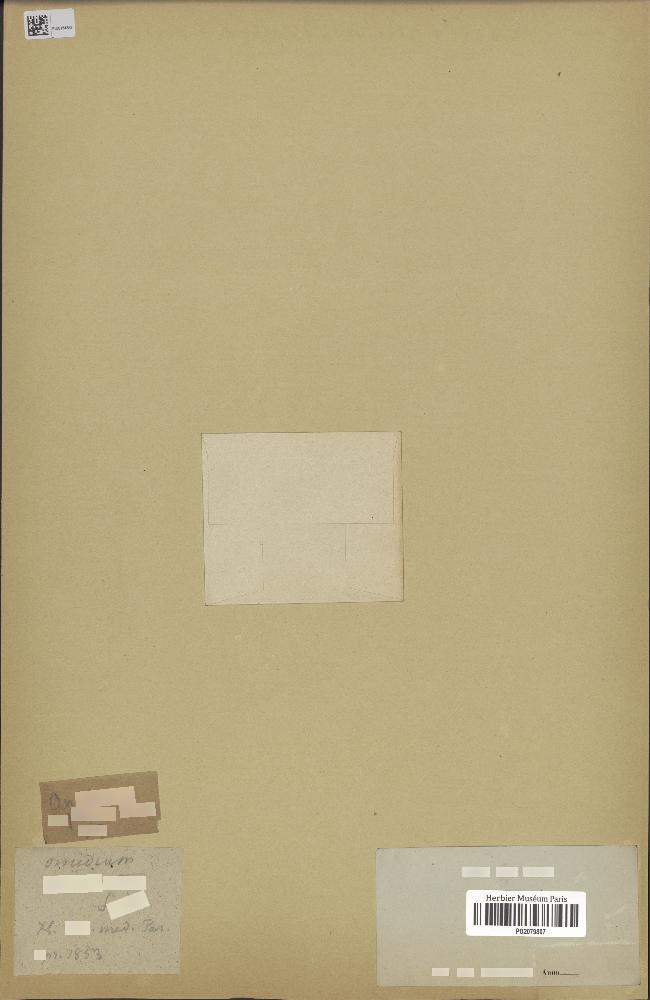

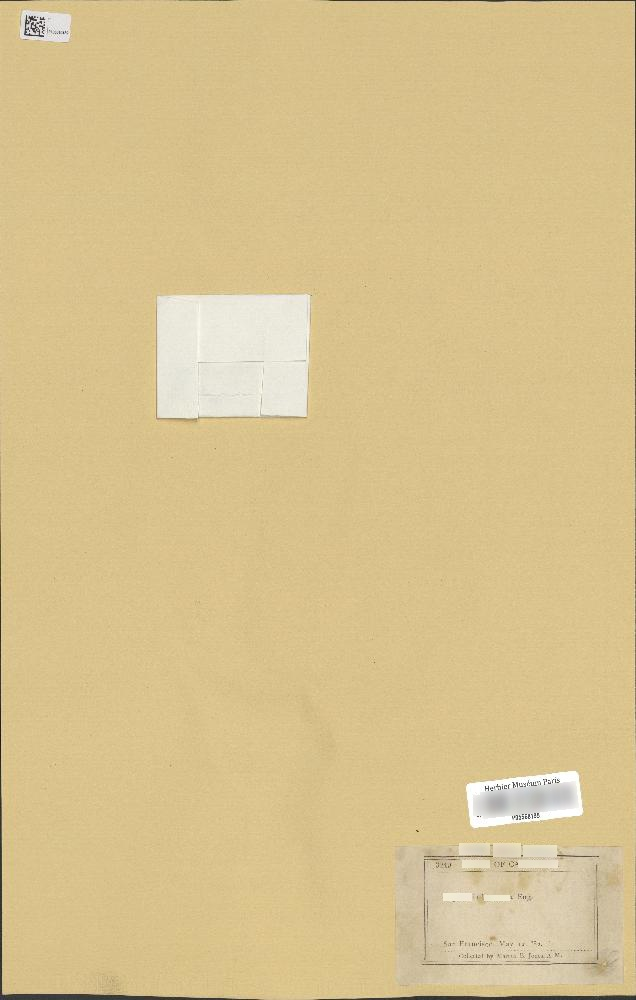

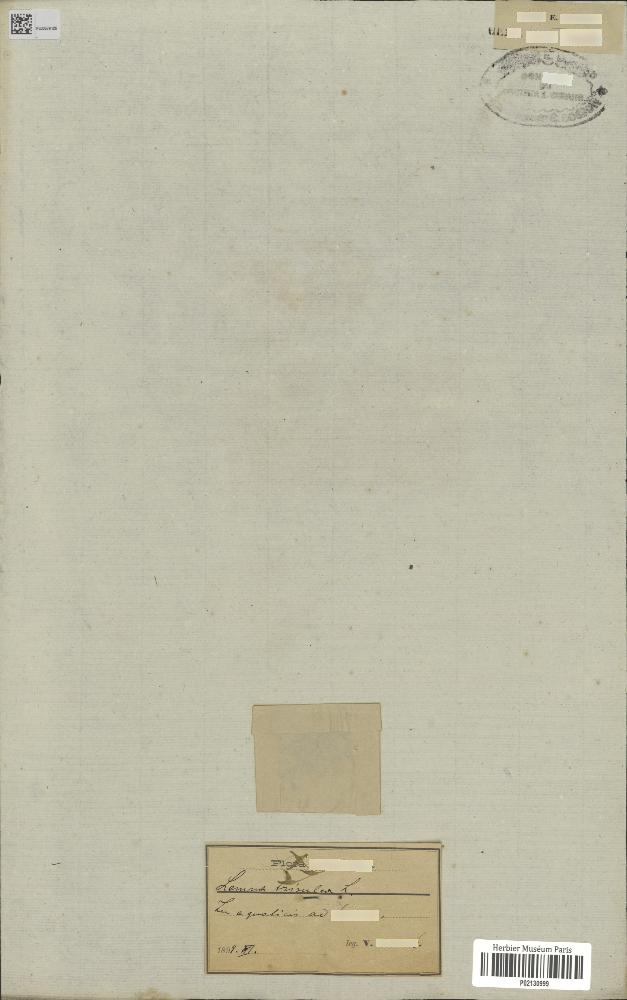

In [ ]:
for i in uwu[uwu].index:
    pth=(images[i])
    img = Image.open(pth)
    display(img)
    if i == 90679:
        break

## Ridge operators

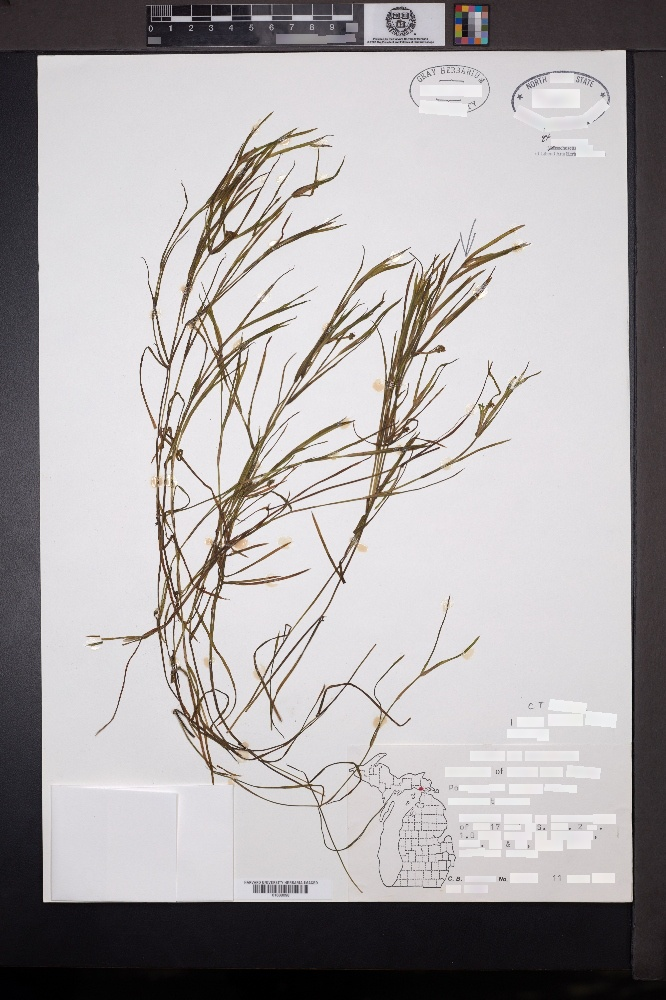

In [9]:
im = Image.open(images[3064])
display(im)

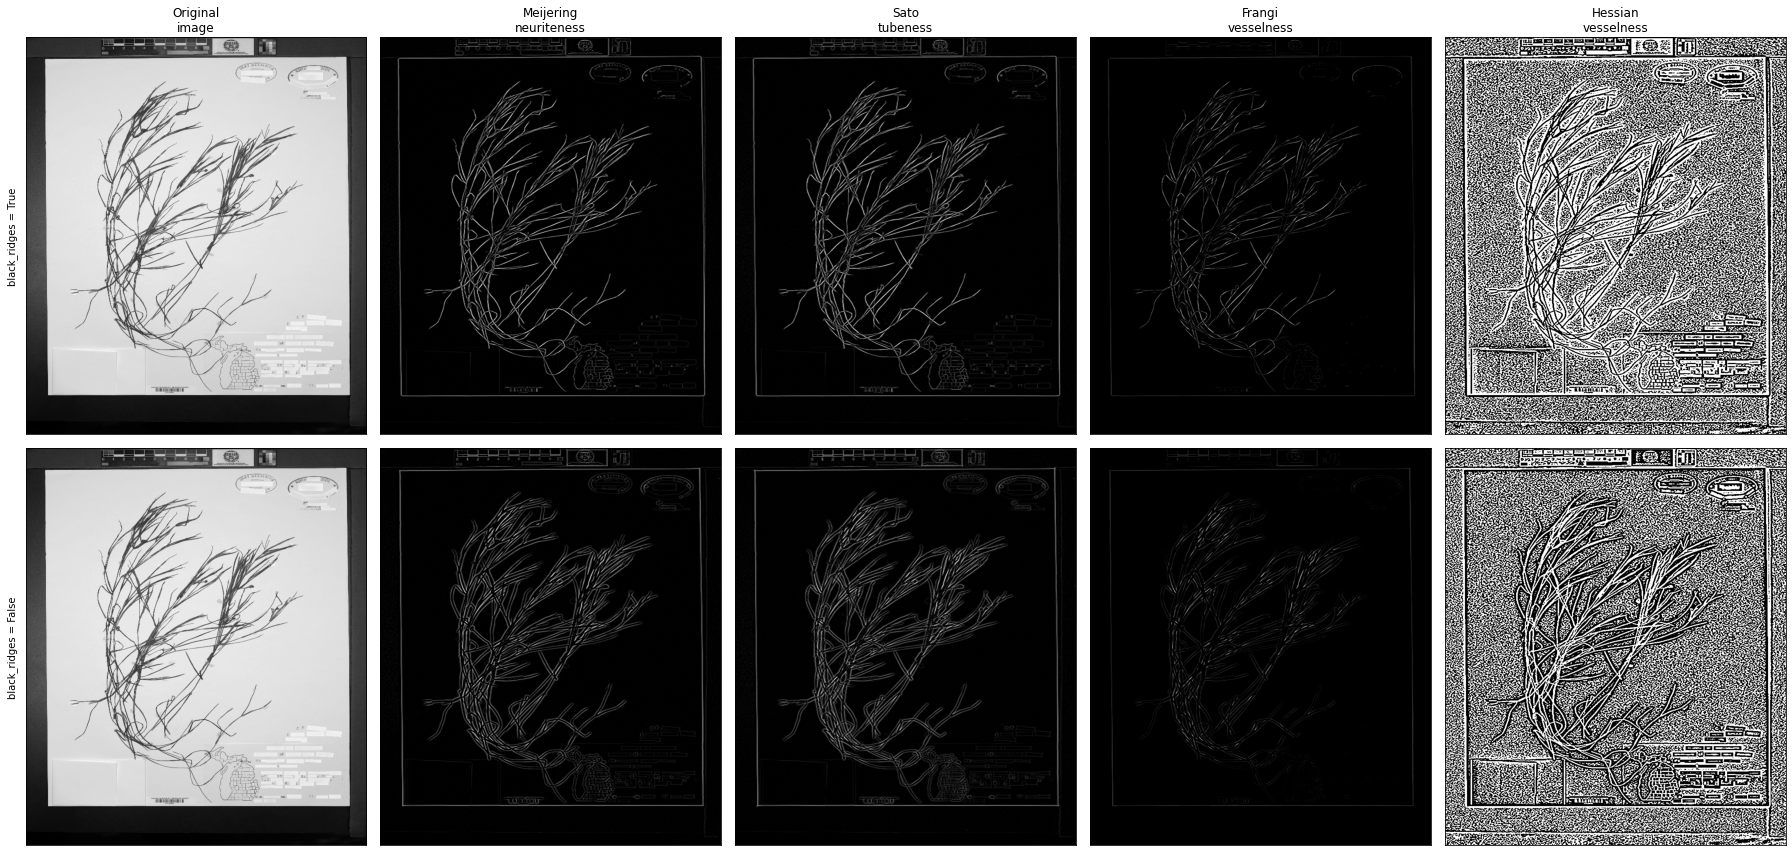

In [11]:
from skimage import data
from skimage import color
from skimage.filters import meijering, sato, frangi, hessian
import matplotlib.pyplot as plt


def identity(image, **kwargs):
    """Return the original image, ignoring any kwargs."""
    return image


image = color.rgb2gray(Image.open(images[3064]))
cmap = plt.cm.gray

kwargs = {'sigmas': [1], 'mode': 'reflect'}

fig, axes = plt.subplots(2, 5, figsize=(25,12))
for i, black_ridges in enumerate([1, 0]):
    for j, func in enumerate([identity, meijering, sato, frangi, hessian]):
        kwargs['black_ridges'] = black_ridges
        result = func(image, **kwargs)
        axes[i, j].imshow(result, cmap=cmap, aspect='auto')
        if i == 0:
            axes[i, j].set_title(['Original\nimage', 'Meijering\nneuriteness',
                                  'Sato\ntubeness', 'Frangi\nvesselness',
                                  'Hessian\nvesselness'][j])
        if j == 0:
            axes[i, j].set_ylabel('black_ridges = ' + str(bool(black_ridges)))
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])

plt.tight_layout()
plt.show()

<function identity at 0x7fe24df29700> , black_ridges= 1


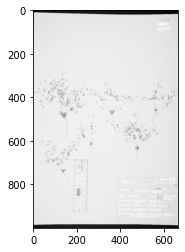

<function meijering at 0x7fe31eb40940> , black_ridges= 1


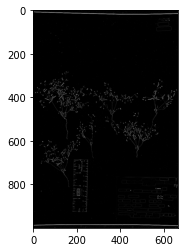

<function sato at 0x7fe31eb409d0> , black_ridges= 1


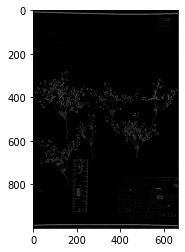

<function frangi at 0x7fe31eb40a60> , black_ridges= 1


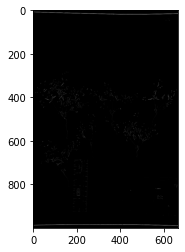

<function hessian at 0x7fe31eb40af0> , black_ridges= 1


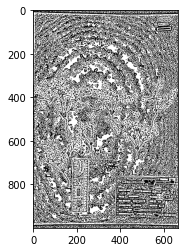

<function identity at 0x7fe24df29700> , black_ridges= 0


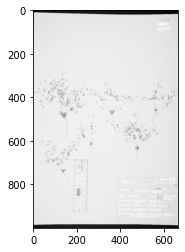

<function meijering at 0x7fe31eb40940> , black_ridges= 0


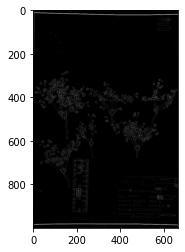

<function sato at 0x7fe31eb409d0> , black_ridges= 0


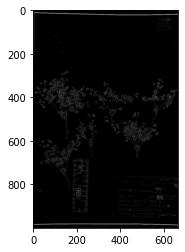

<function frangi at 0x7fe31eb40a60> , black_ridges= 0


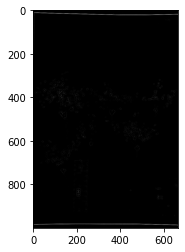

<function hessian at 0x7fe31eb40af0> , black_ridges= 0


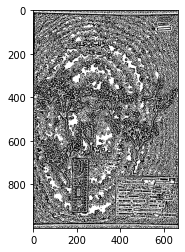

In [8]:
from skimage import data
from skimage import color
from skimage.filters import meijering, sato, frangi, hessian
import matplotlib.pyplot as plt


def identity(image, **kwargs):
    """Return the original image, ignoring any kwargs."""
    return image


image = color.rgb2gray(Image.open(images[30642]))
cmap = plt.cm.gray

kwargs = {'sigmas': [1], 'mode': 'reflect'}

for i, black_ridges in enumerate([1, 0]):
    for j, func in enumerate([identity, meijering, sato, frangi, hessian]):
        kwargs['black_ridges'] = black_ridges
        result = func(image, **kwargs)
        print(func, ", black_ridges=",black_ridges)
        plt.imshow(result, cmap=cmap)
        plt.show()
        

plt.show()

## Luminiscance

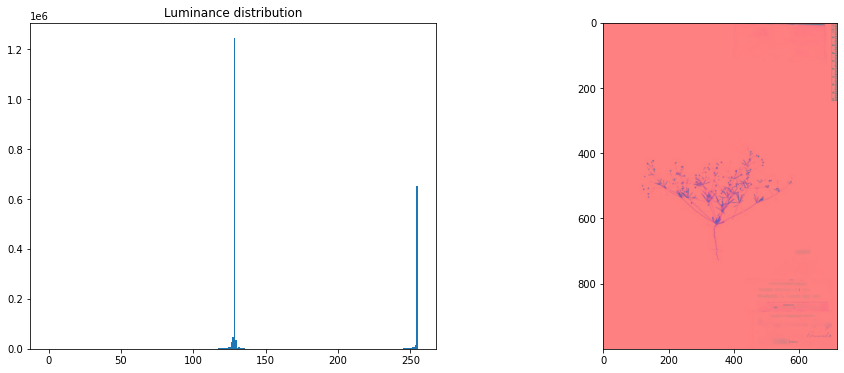

In [ ]:
img=images[30643]
img=cv2.imread(img)
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
plt.figure(figsize = (16,6))
plt.subplot(1, 2, 1)

plt.hist(img_yuv.flatten(), bins=range(256))
plt.title('Luminance distribution')
plt.subplot(1, 2, 2)
plt.imshow(img_yuv)

plt.show()

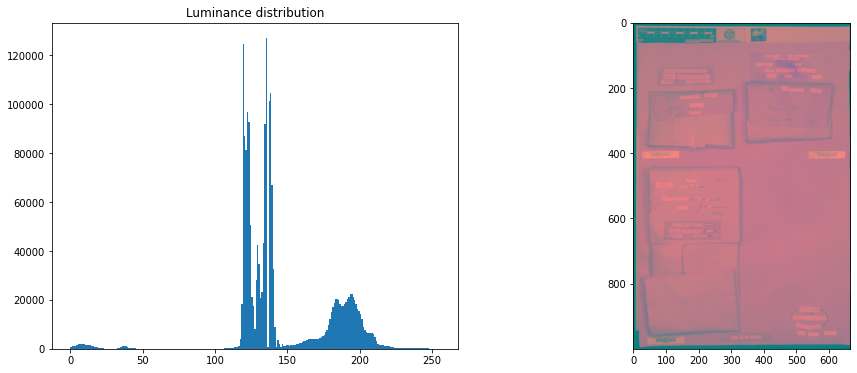

In [ ]:
import cv2
img="/home/amorante/herbarium/train_images/000/00/00000__007.jpg"
img=cv2.imread(img)
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
plt.figure(figsize = (16,6))
plt.subplot(1, 2, 1)

plt.hist(img_yuv.flatten(), bins=range(256))
plt.title('Luminance distribution')
plt.subplot(1, 2, 2)
plt.imshow(img_yuv)

plt.show()